In [13]:
import pandas as pd
import numpy as np
import os
from prophet import Prophet
import plotly.graph_objects as go
from sklearn.metrics import r2_score # R^2 score
from sklean.metrics import mean_squared_error # squared = True for MSE, False for RMSE
from sklearn.metrics import mean_absolute_error # mean absolute error

%matplotlib inline

## 1 day data

In [14]:
day_dir = '../data/ready/1-day-data/{}'
day_files = os.listdir(day_dir.format(''))

Description of plots:

black dots: historical values

blue line: forecasted values

light blue area: uncertainty intervals 

In [41]:
help(Prophet)

assed to `fit` and `predict` will have a column with the
 |      specified name to be used as a regressor. When standardize='auto', the
 |      regressor will be standardized unless it is binary. The regression
 |      coefficient is given a prior with the specified scale parameter.
 |      Decreasing the prior scale will add additional regularization. If no
 |      prior scale is provided, self.holidays_prior_scale will be used.
 |      Mode can be specified as either 'additive' or 'multiplicative'. If not
 |      specified, self.seasonality_mode will be used. 'additive' means the
 |      effect of the regressor will be added to the trend, 'multiplicative'
 |      means it will multiply the trend.
 |      
 |      Parameters
 |      ----------
 |      name: string name of the regressor.
 |      prior_scale: optional float scale for the normal prior. If not
 |          provided, self.holidays_prior_scale will be used.
 |      standardize: optional, specify whether this regressor will b

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


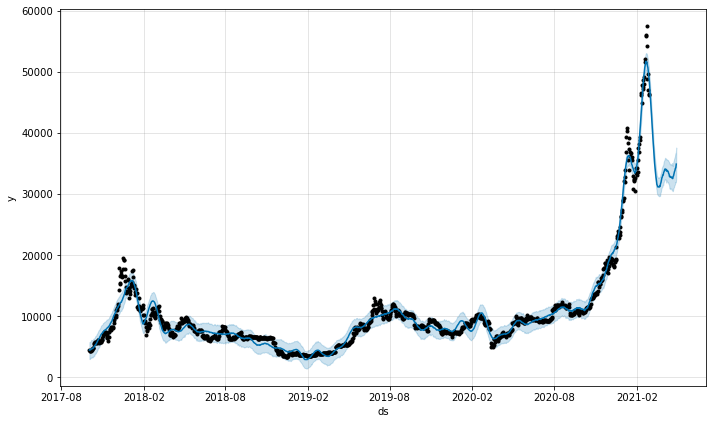

In [51]:
for filename in day_files:
    df = pd.read_csv(day_dir.format(filename))
    df['y'] = df['close']
    m = Prophet(seasonality_mode='multiplicative')
    m.fit(df)
    future = m.make_future_dataframe(periods=60)
    forecast = m.predict(future)
    fig = go.Figure()
    # fig.add_trace(go.Scatter(x=df['ds'][0:-90], y=df['y'][0:-90], name='Train'))
    fig.add_trace(go.Scatter(x=forecast['ds'], y=forecast['yhat'], name='Forecasts'))
    fig.add_trace(go.Scatter(x=df['ds'], y=df['y'], name='Actual'))
    fig.show()
    fig1 = m.plot(forecast)
    break
    # print(r2_score(df['y'][-60:], forecasts['yhat'][-60:]))
   